## Analysis By Oluwadamilare Tobiloba

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
import statsmodels.api as sm
warnings.filterwarnings("ignore")
import sklearn

In [2]:
data = pd.read_csv(r"C:\Users\tbigg\Downloads\titanic_train.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data Dictionary

 * Pclass - passager class.
 * Embark - passager destinationn
 * SibSp - No of siblings/spouse abroad
 * parch - No. of parent/child abroad
 * fare - what ticket they got

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Data Reduction

In [7]:
data.drop(['PassengerId', 'Cabin'], axis=1, inplace = True)

In [8]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Handling Missing Values

### Visualizing the missing values in each Variable/Column

<Axes: >

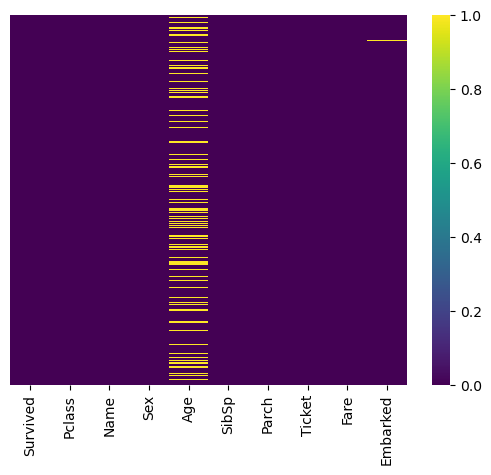

In [9]:

sns.heatmap(data.isnull(), yticklabels = False, cmap = 'viridis')

### Using Boxplot to check for the mean age for each passanger class

 - This is done so as to fill the missing values in each class correctly(Using mean value)
 - This will also help check outlier in the variable

<Axes: xlabel='Pclass', ylabel='Age'>

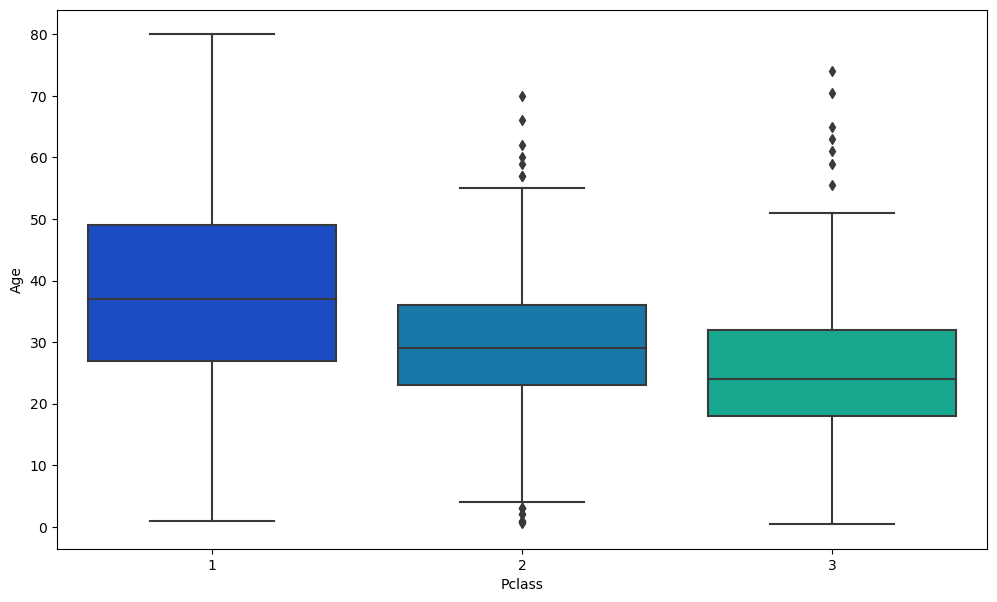

In [10]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = data, palette = 'winter')

### Filling the missing values for each passanger class by their mean age

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull (Age):
        if Pclass ==1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
    else:
        return Age

data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [12]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

### Dropping the records with missing values(Embarked) in dataframe.

In [19]:
data = data.dropna()

In [20]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Statistical Analysis

In [25]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,889.0,NaN,NaN,NaN,0.382452,0.48626,0.0,0.0,0.0,1.0,1.0
Pclass,889.0,NaN,NaN,NaN,2.311586,0.8347,1.0,2.0,3.0,3.0,3.0
Name,889,889,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,889,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,889.0,NaN,NaN,NaN,29.019314,13.209814,0.42,22.0,26.0,36.5,80.0
SibSp,889.0,NaN,NaN,NaN,0.524184,1.103705,0.0,0.0,0.0,1.0,8.0
Parch,889.0,NaN,NaN,NaN,0.382452,0.806761,0.0,0.0,0.0,0.0,6.0
Ticket,889,680,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,889.0,NaN,NaN,NaN,32.096681,49.697504,0.0,7.8958,14.4542,31.0,512.3292
Embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
std_dev = data['Fare'].std()
variance = data['Fare'].var()
range = data['Fare'].max() - data['Fare'].min()
mean = data['Fare'].mean()
median = data['Fare'].median()
mode = data['Fare'].mode()

print("Fare Standard Deviation:" , std_dev)
print("Fare variance:" , variance)
print("Fare range:" , range)
print("Fare mean:" , std_dev)
print("Fare median:" , median)
print("Fare mode:" , mode)

Fare Standard Deviation: 49.69750431670801
Fare variance: 2469.8419353092113
Fare range: 512.3292
Fare mean: 49.69750431670801
Fare median: 14.4542
Fare mode: 0    8.05
Name: Fare, dtype: float64


### One-sample t-test

* p-value: The probability of observing the test results under the null hypothesis. A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject Null hypothesis


 * t-statistic / F-statistic / Chi-square statistic: These statistics measure the degree to which the sample data deviate from the null hypothesis.

In [32]:
# Testing if the mean of a column is equal to a specific value
sample_data = data['Fare']
t_stat, p_value = stats.ttest_1samp(sample_data, popmean=49.6)  # Replace `0` with your hypothesis mean

print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: -10.501146355993125, p-value: 2.140936824217308e-24


### Chi-Square test

In [35]:
# Testing if there is a significant association between two categorical variables
contingency_table = pd.crosstab(data['Name'], data['Ticket'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}, p-value: {p}")


Chi-square statistic: 603631.0, p-value: 0.26805857254411364


# Exploratory Data Analysis (EDA)

### Univariate analysis

In [37]:
# separating Numerical and categorical variables for easy analysis

cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')
Numerical Variables:
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


### Numerical Distribution without KDE

Survived
Skew: 0.48


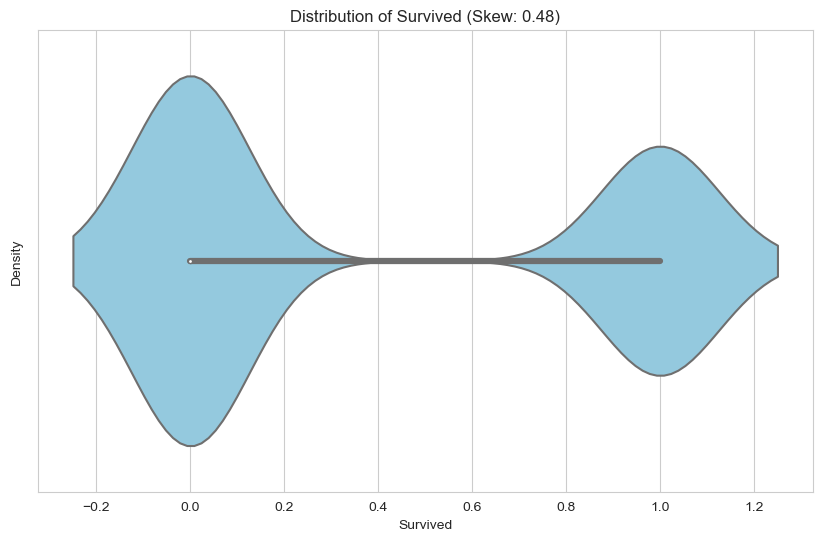

Pclass
Skew: -0.64


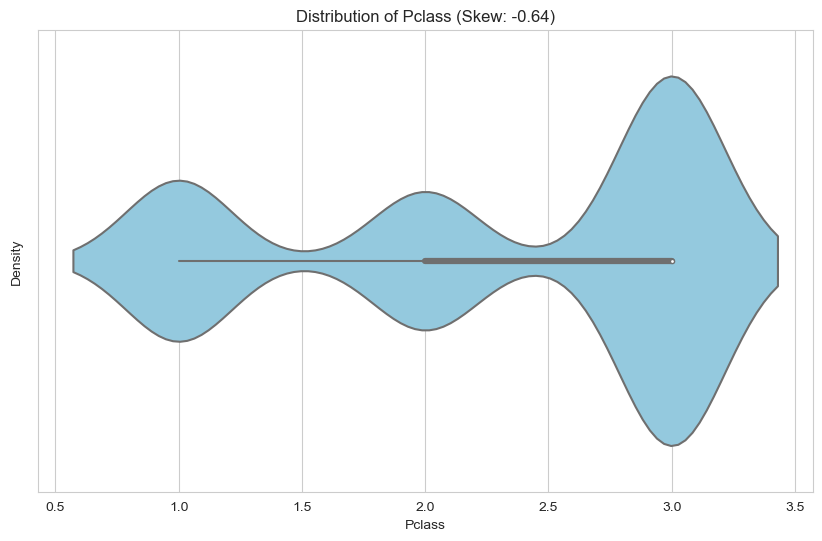

Age
Skew: 0.55


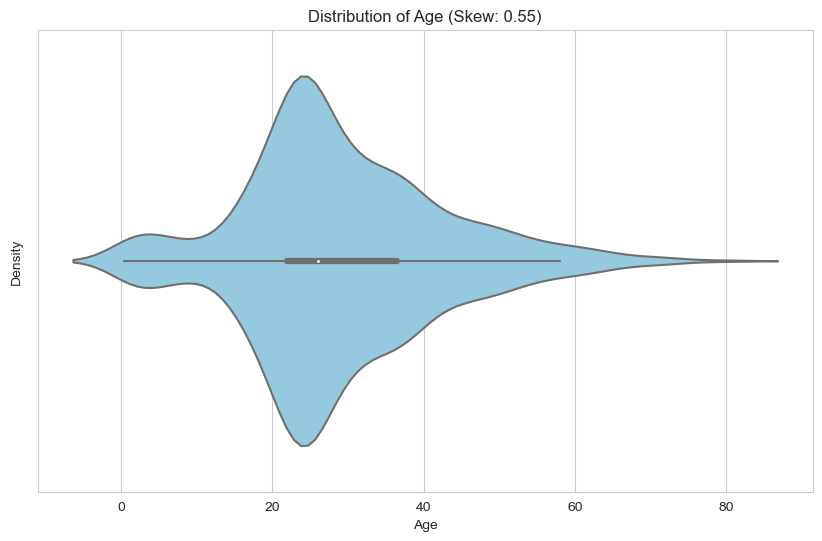

SibSp
Skew: 3.69


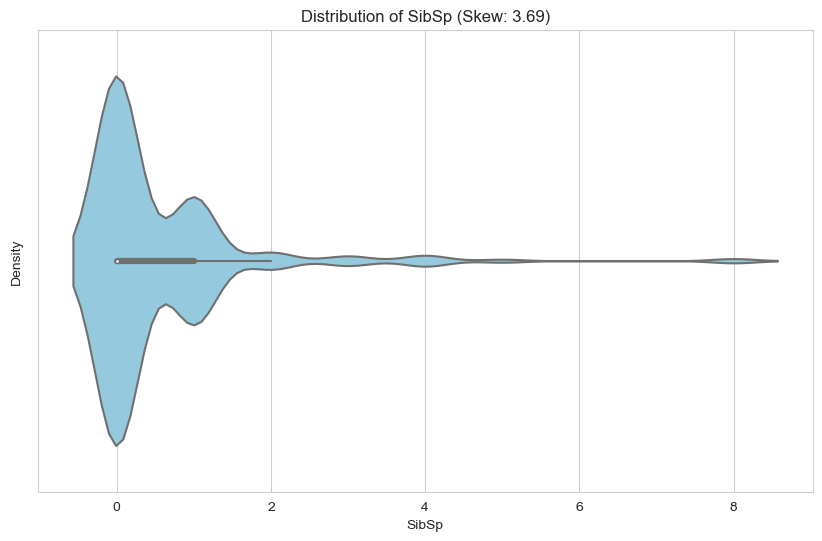

Parch
Skew: 2.75


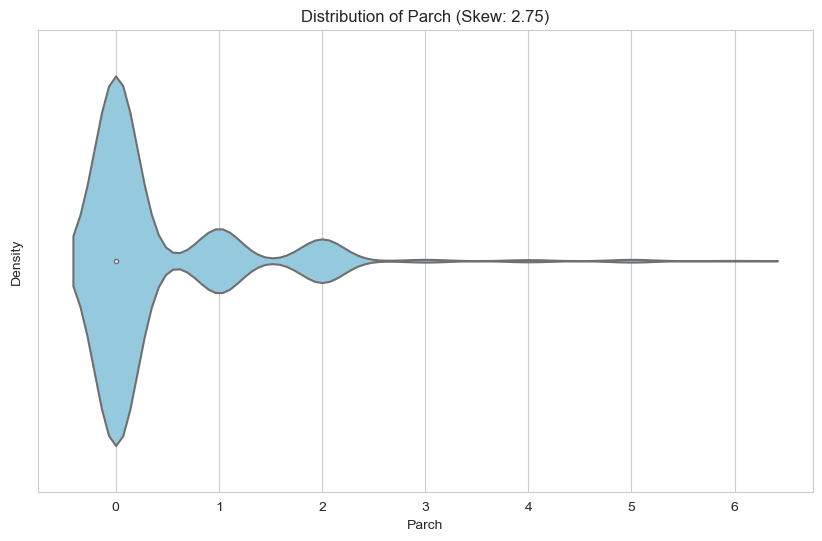

Fare
Skew: 4.8


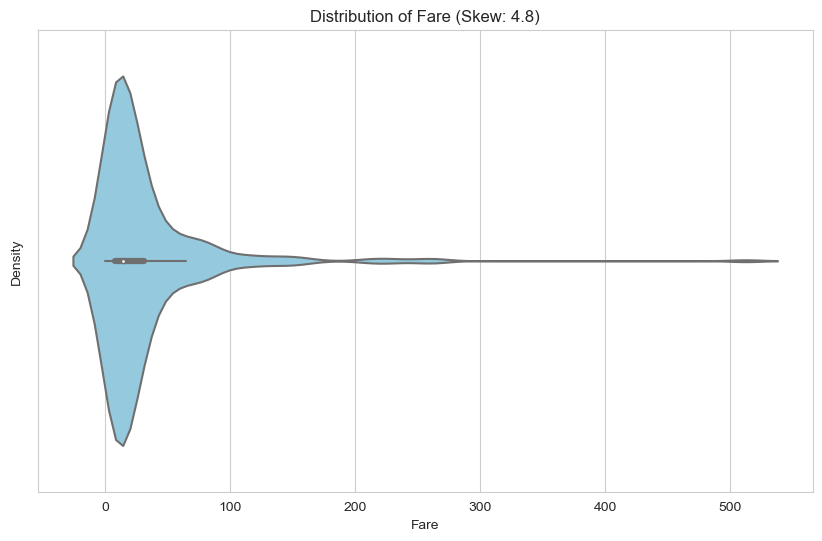

In [38]:
for col in num_cols:
    print(col)
    skewness = round(data[col].skew(), 2)
    print('Skew:', skewness)
    
    plt.figure(figsize=(10, 6))
    
    # Create a violin plot
    sns.violinplot(x=data[col], inner='box', color='skyblue')
    plt.title(f'Distribution of {col} (Skew: {skewness})')
    plt.xlabel(col)
    plt.ylabel('Density')

    # Show plot
    plt.show()

### Numerical Distribution with KDE
 * This version includes a kernel density estimate (KDE) plot overlay for additional insight into the data's distribution.

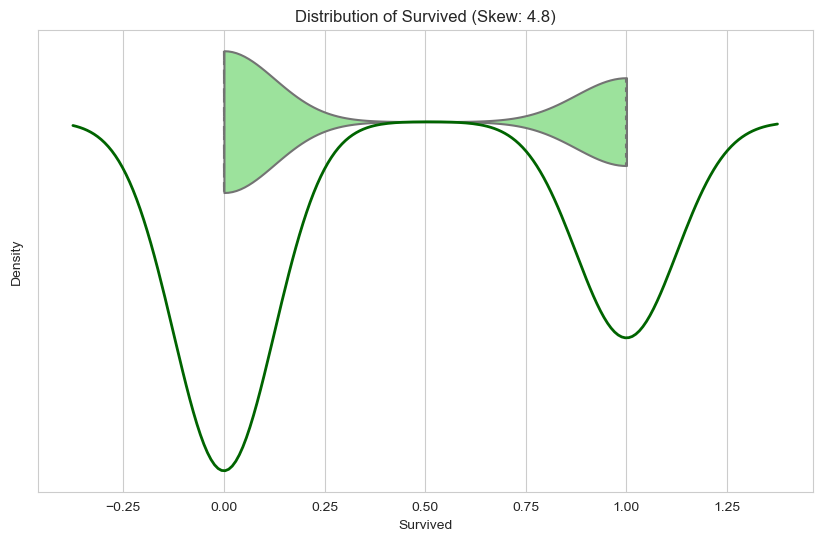

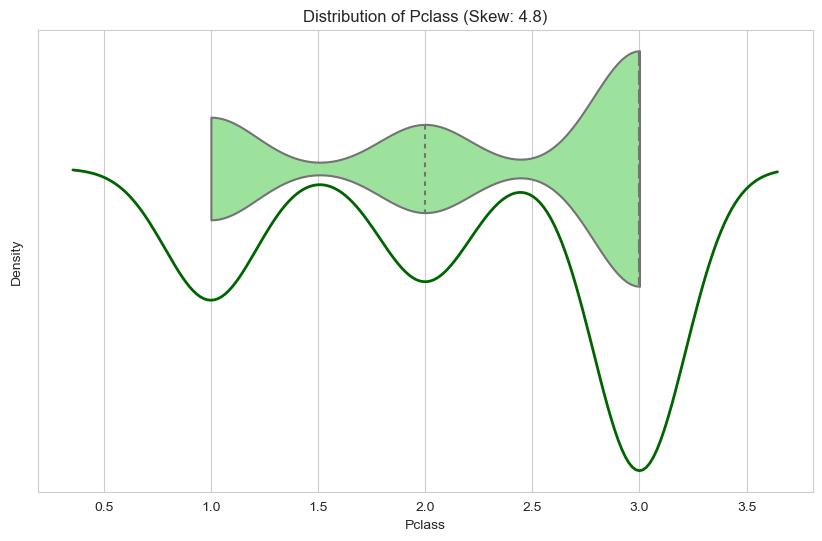

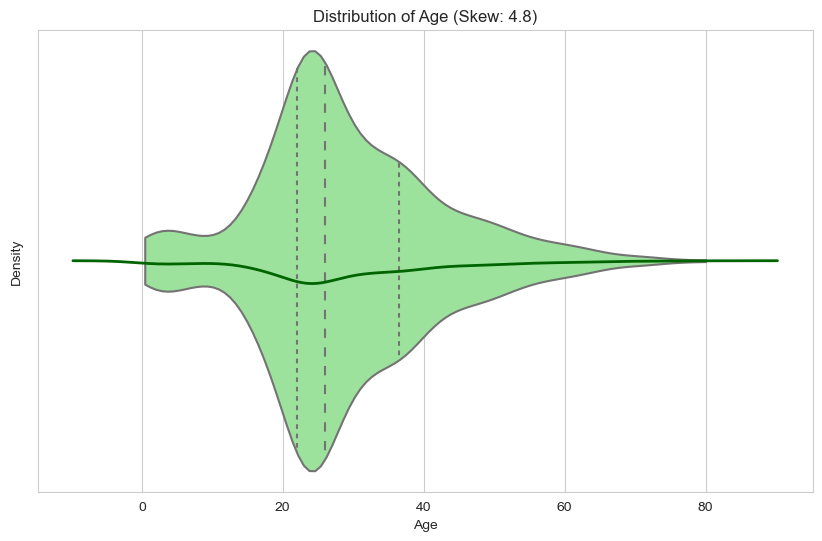

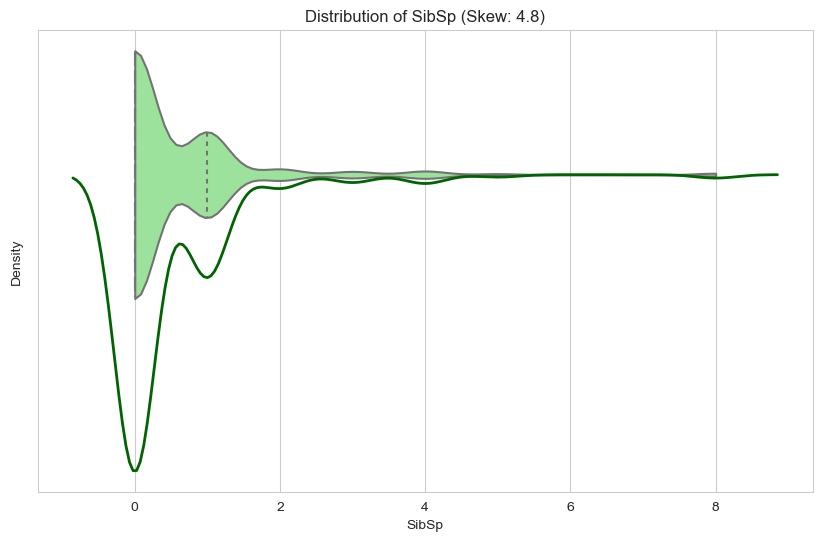

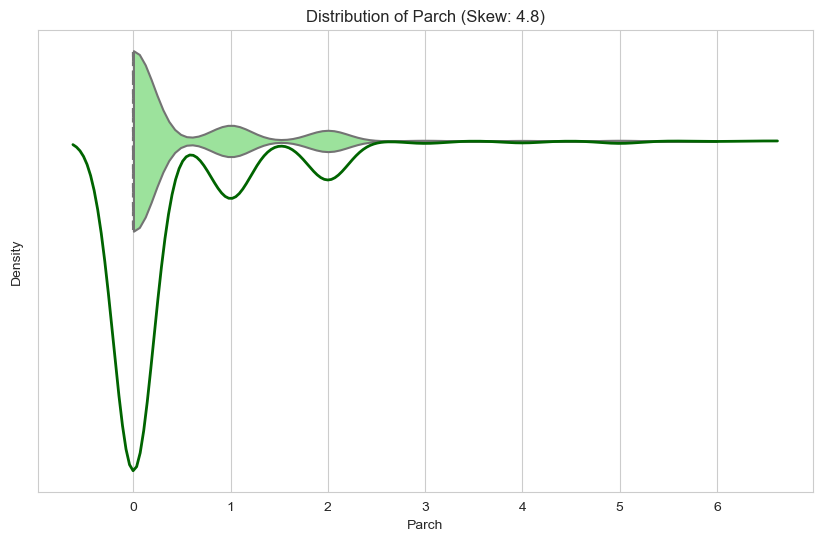

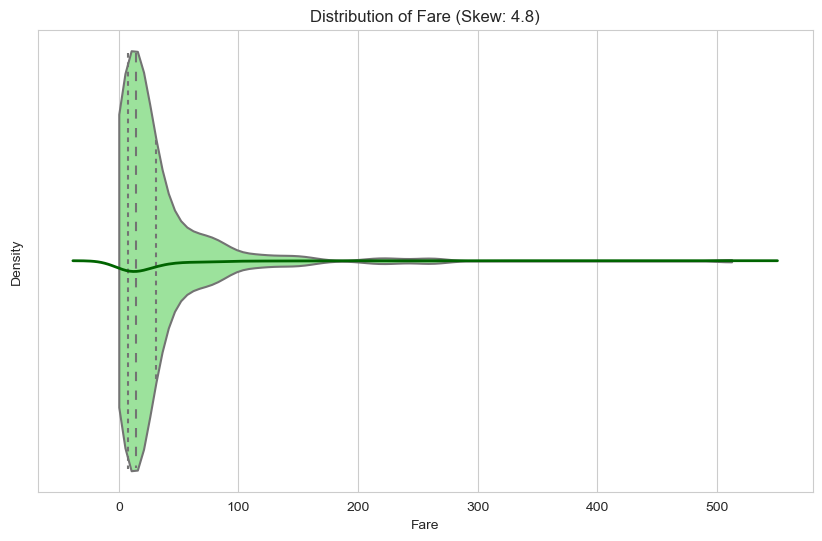

In [39]:
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=data[col], inner='quartile', color='lightgreen', cut=0)
    sns.kdeplot(data[col], color='darkgreen', linewidth=2)
    plt.title(f'Distribution of {col} (Skew: {skewness})')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

### Distribution for categorical Variables

Name
Mode: Braund, Mr. Owen Harris (0.11%)


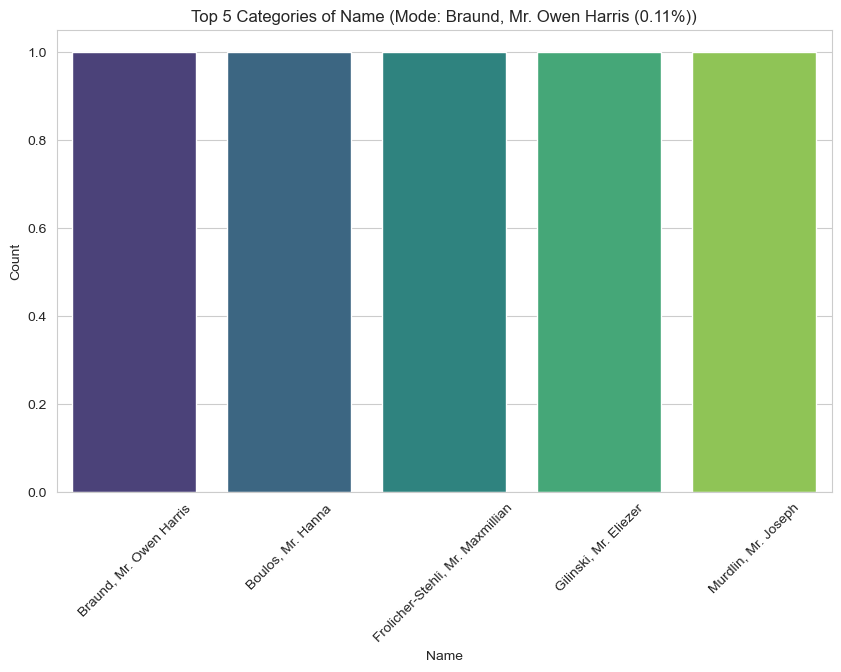

Sex
Mode: male (64.90%)


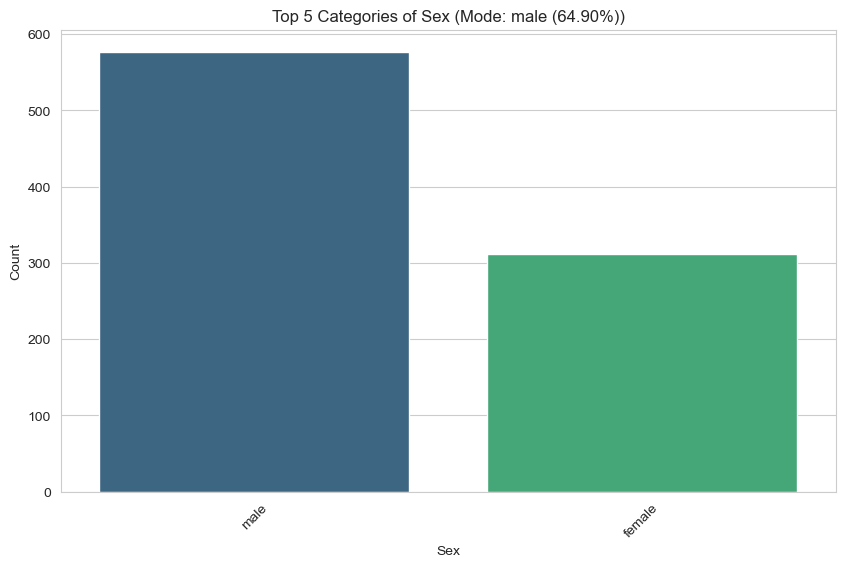

Ticket
Mode: 347082 (0.79%)


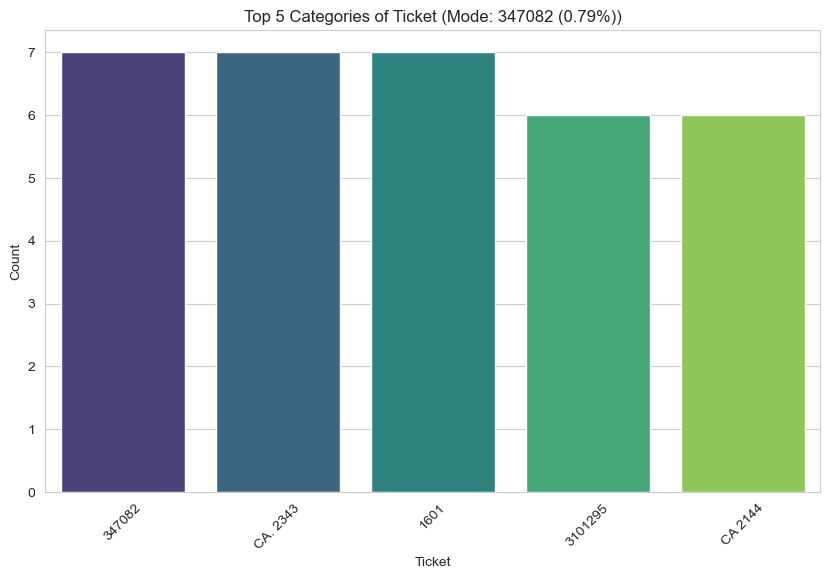

Embarked
Mode: S (72.44%)


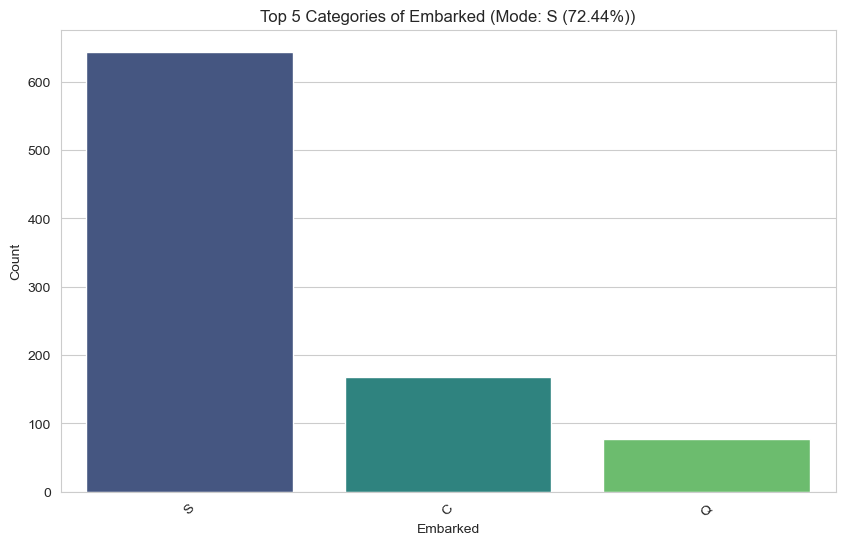

In [41]:
for col in cat_cols:
    print(col)
    
    # Get the top 5 categories by count
    top_categories = data[col].value_counts().nlargest(5)
    total = len(data[col])
    
    # Calculate mode and its percentage
    mode_value = top_categories.idxmax()
    mode_count = top_categories.max()
    mode_percentage = (mode_count / total) * 100
    mode_info = f'Mode: {mode_value} ({mode_percentage:.2f}%)'
    
    print(mode_info)
    
    plt.figure(figsize=(10, 6))
    
    # Create a bar plot with only the top 5 categories
    sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
    
    # Add title and labels
    plt.title(f'Top 5 Categories of {col} ({mode_info})')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Rotate x-axis labels if necessary
    plt.xticks(rotation=45)
    
    # Show plot
    plt.show()

# BiVariate Analysis

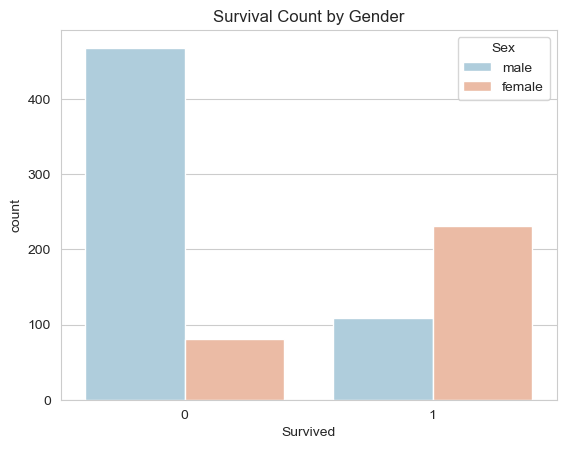

In [45]:
# Set the plot style
sns.set_style('whitegrid')
# Create the countplot
ax = sns.countplot(x='Survived', hue='Sex', data=data, palette='RdBu_r')
# Add title
plt.title('Survival Count by Gender')
# Show plot
plt.show()

Text(0.5, 1.0, 'Survival Count by Passanger Class')

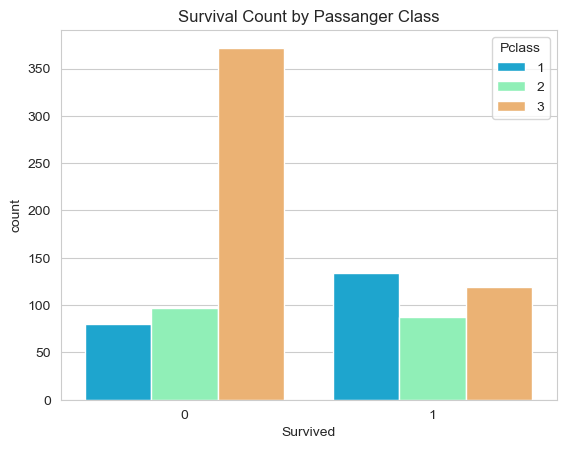

In [46]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', hue = 'Pclass', data = data, palette = 'rainbow')
# Add title
plt.title('Survival Count by Passanger Class')

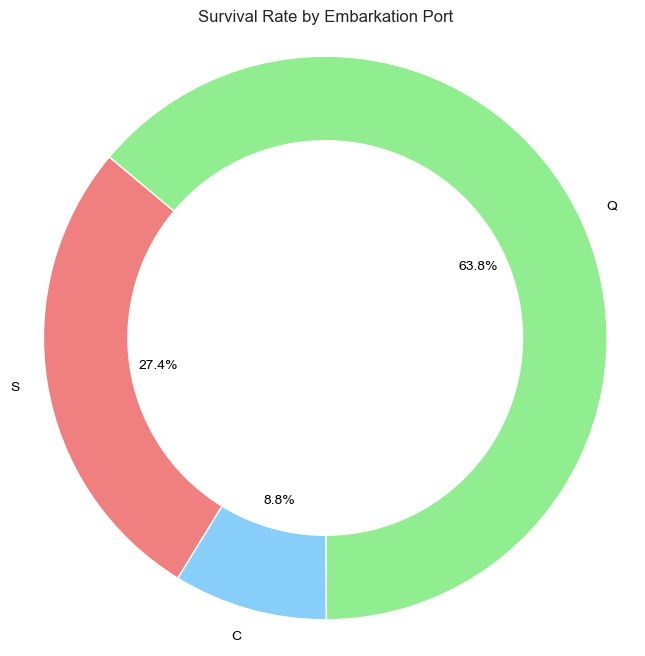

In [62]:
labels = data['Embarked'].unique()  # Extract unique categories for labels
sizes = data.groupby('Embarked')['Survived'].sum()  # Group and sum by category
# Customize colors for better visual distinction (optional)
colors = ['lightcoral', 'lightskyblue', 'lightgreen']  # Example color scheme

# Create the donut chart with enhancements
plt.figure(figsize=(8, 8))  # Set figure size for better readability
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',  # Display percentages with one decimal place
        startangle=140,
        colors=colors,  # Apply custom colors
        wedgeprops=dict(width=0.6),  # Adjust slice width for better separation
        textprops=dict(color='black')  # Ensure black text for better contrast
        )

# Create the center circle for the donut effect
centre_circle = plt.Circle((0, 0), 0.70, color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Maintain equal aspect ratio for a circular pie
plt.title('Survival Rate by Embarkation Port')  


plt.show()


### Multivariate Analysis

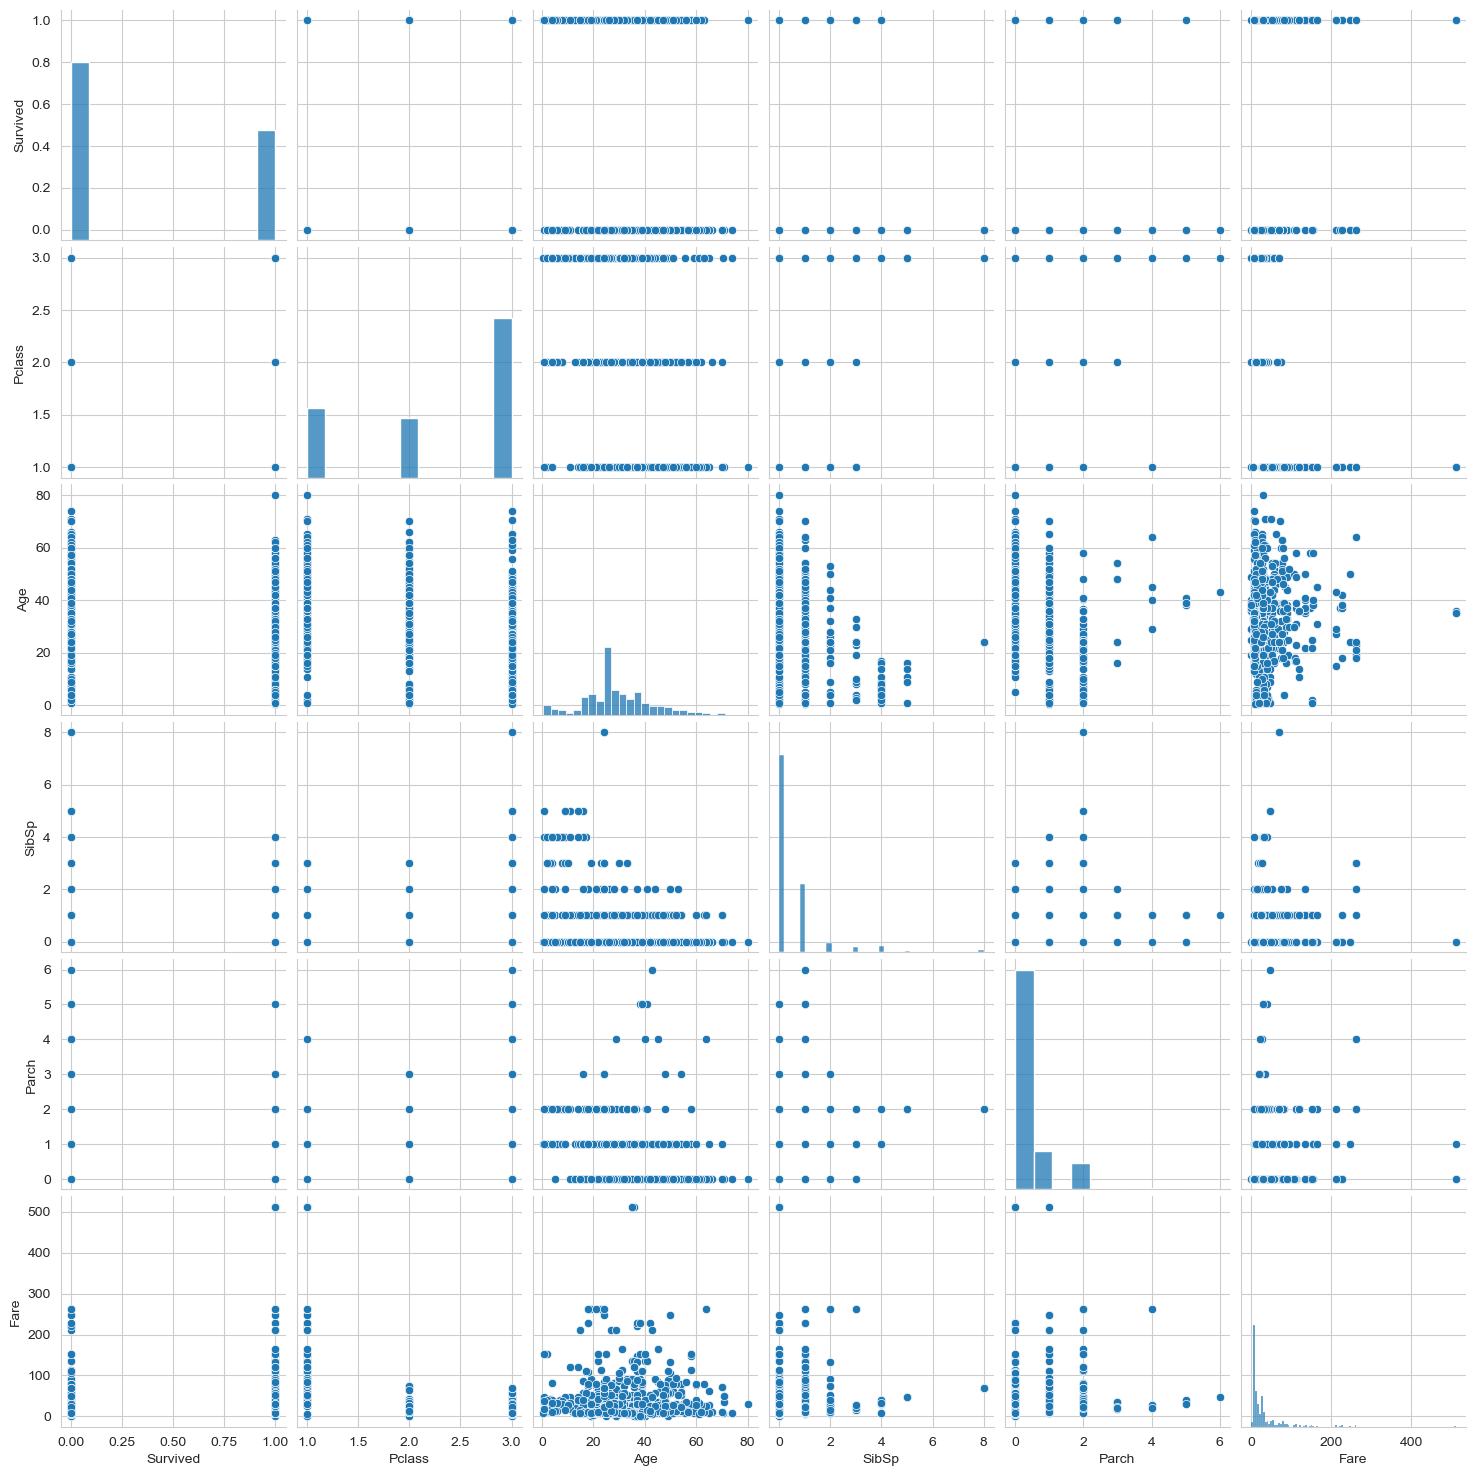

In [68]:
#pairPlot
sns.pairplot(data)
plt.show()

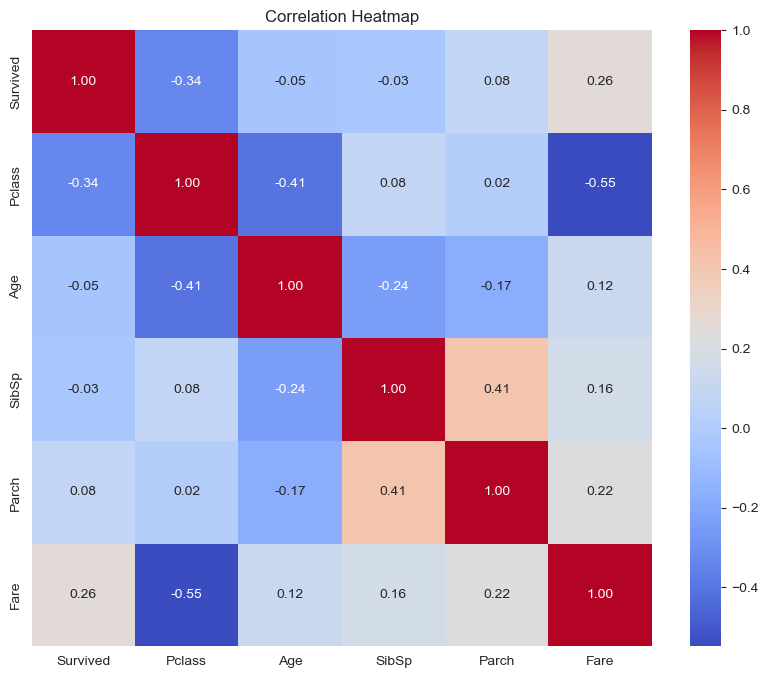

In [72]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(['Name', 'Sex', 'Ticket', 'Embarked'],axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

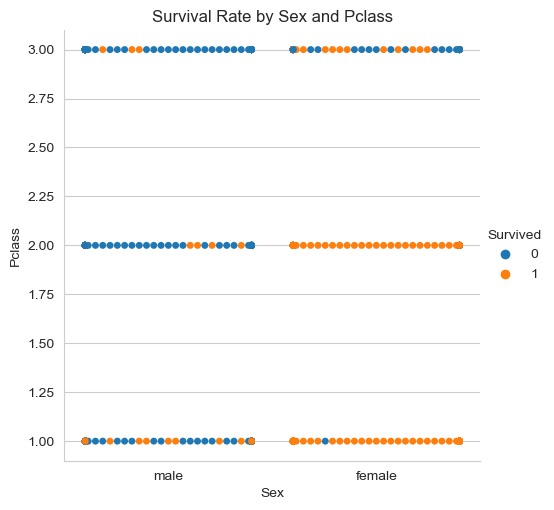

In [79]:
sns.catplot(x='Sex', y='Pclass', hue='Survived', data=data, kind='swarm')

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Pclass')
plt.title('Survival Rate by Sex and Pclass')

plt.show()

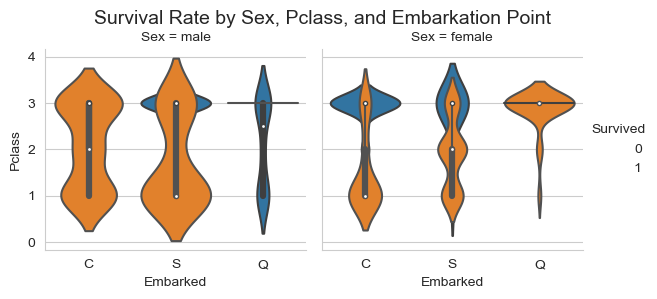

In [82]:
g = sns.FacetGrid(data, col="Sex", hue="Survived", col_wrap=2)  # Adjust col_wrap for readability

# Use violin plots for better distribution visualization
g.map(sns.violinplot, "Embarked", "Pclass", size="Survived", showmeans=True)

# Add labels, title, and adjust legend position
g.set_axis_labels(x_var="Embarked", y_var="Pclass")
g.fig.suptitle('Survival Rate by Sex, Pclass, and Embarkation Point', fontsize=14)
g.add_legend(title="Survived")

plt.subplots_adjust(top=0.85)  # Adjust spacing to accommodate title

plt.show()

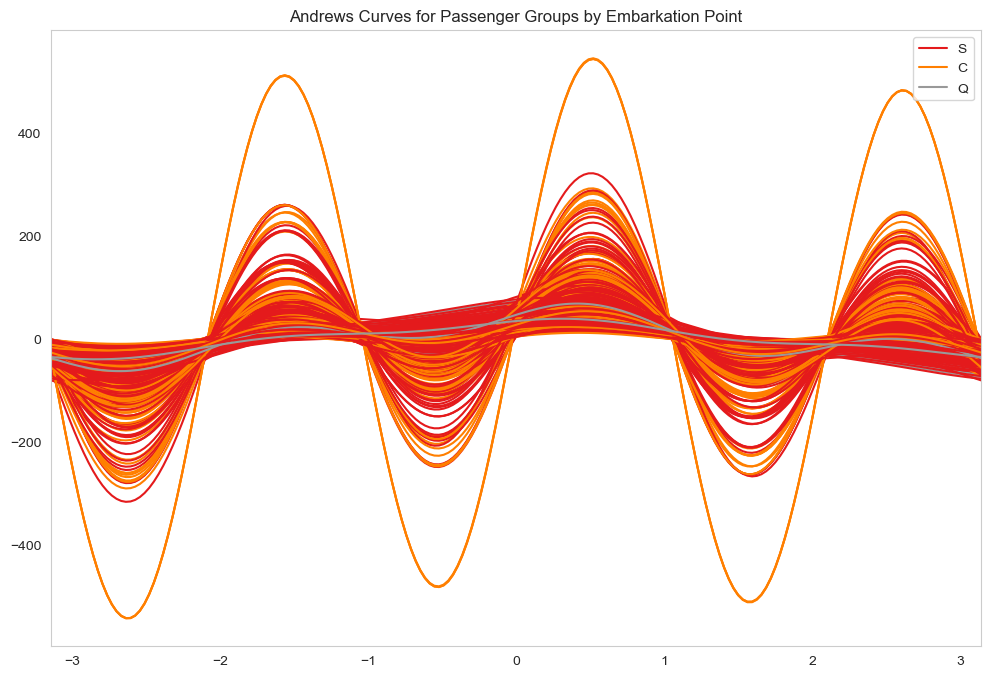

In [98]:
import pandas.plotting as pdplt  # Import for convenience

# Select only numeric columns (excluding categorical features)
numeric_data = data.select_dtypes(exclude='object')

# Add the categorical 'Embarked' column for class distinction
numeric_data['Embarked'] = data['Embarked'].astype('category')  # Ensure categorical type

plt.figure(figsize=(12, 8))
pdplt.andrews_curves(numeric_data, 'Embarked', colormap='Set1')
plt.title('Andrews Curves for Passenger Groups by Embarkation Point')
plt.show()

**Andrews Curves** are a technique for visualizing high-dimensional data. Each data point is transformed into a function and plotted. The shape of the resulting curve can reveal patterns and similarities among data points.

**In the context of my Vizz:**

* I'm using Andrews Curves to visualize how different passenger groups (based on 'Embarked') differ in terms of their numeric attributes (like 'Pclass', 'Age', etc.).
* Each curve represents a passenger, and the shape of the curve is influenced by the values of the numeric attributes.
* By coloring the curves based on the 'Embarked' category, i can visually explore if there are distinct patterns among passengers from different embarkation points.

**Key points to remember:**

* The absolute shape of an individual curve doesn't have a direct interpretation.
* The value of Andrews Curves lies in comparing the shapes of curves from different groups.
* Similar shapes suggest potential similarities between data points.
* The technique is useful for exploratory data analysis and identifying potential clusters or outliers.


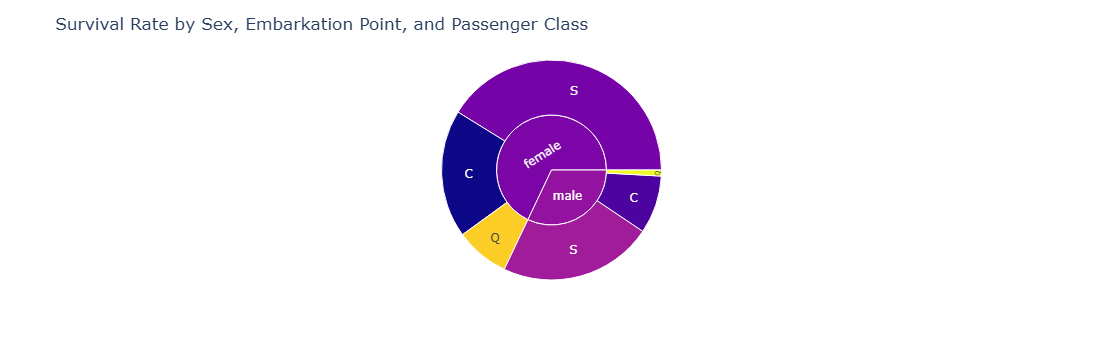

In [102]:
import plotly.express as px

# Filter data for survived passengers (optional)
survived_data = data[data['Survived'] == 1]  # Modify if needed

# Create a more informative path with meaningful categories
fig = px.sunburst(survived_data, 
                  path=['Sex', 'Embarked'],  # Focus on Sex and Embarked
                  values='Survived',  
                  color='Pclass',  # Color by passenger class
                  color_discrete_sequence=['royalblue', 'lightskyblue', 'lightcoral'])  # Set color sequence

# Customize the layout for better readability
fig.update_layout(
    title='Survival Rate by Sex, Embarkation Point, and Passenger Class',
    coloraxis_showscale=False  # Hide color scale for Pclass (optional)
)

fig.show()

**Explanation of improvements:**

* **Filtered data (optional):** If you want to focus on survival rates, you can filter the data to only include survived passengers (`data[data['Survived'] == 1]`).
* **Simplified path:** We focus on the 'Sex' and 'Embarked' categories for a clearer visualization of survival rates by these two factors.
* **Color by Pclass:** We use the 'Pclass' column to color-code the sunburst slices, potentially revealing trends in survival rates across different passenger classes.
* **Color sequence:** We set a specific color sequence for the 'Pclass' to improve visual distinction.
* **Informative title:** The title provides a clear description of what the chart represents.
* **Hidden color scale (optional):** If you don't need the color scale for Pclass displayed on the chart, you can hide it using `coloraxis_showscale=False`.

**Additional considerations:**

* **Sorting:** You can explore sorting the slices by survival rate within each category using the `sort` argument in `px.sunburst`.
* **Branch values:** Consider adding branch values using `branchvalues='total_count'` to show the total number of passengers in each category.
* **Interactivity:** Play around with Plotly's interactive features for hover tooltips and zooming capabilities.

By incorporating these changes, you can create a more informative and visually appealing sunburst chart to explore the relationship between sex, embarkation point, passenger class, and survival rates.
